# Exercise 1 

## Import Libraries
Python requires importing libraries and functions you need to access specific tools like science (scipy), linear algebra (numpy), and graphics (matplotlib). These libraries can be installed using the ```pip``` command line tool. Alternatively you can install an python distribution like [Anaconda](https://www.continuum.io/downloads) or [Canopy](https://www.enthought.com/products/canopy/)  which have these and many other standard package pre-installed.

In [1]:
import matplotlib.pyplot as plt # plotting
from skimage.io import imread # read in images
import numpy as np # linear algebra / matrices
from matplotlib.patches import Rectangle
# make the notebook interactive
from ipywidgets import interact, interactive, fixed 
import ipywidgets as widgets #add new widgets
from IPython.display import display
class idict(dict):
    def __init__(self,*args,**kwargs) : dict.__init__(self,*args,**kwargs) 
    def __str__(self): return 'ImageDictionary'
    def __repr__(self): return 'ImageDictionary'

## Load Images
Make sure you extract the ```matlab.zip``` file to the same directory as this notebook so there is a ```data/``` directory (or fix the paths after the ```imread``` command

In [2]:
a=imread('data/scroll.tif')
b=imread('data/wood.tif')
c=imread('data/asphalt_gray.tif')

## Showing images

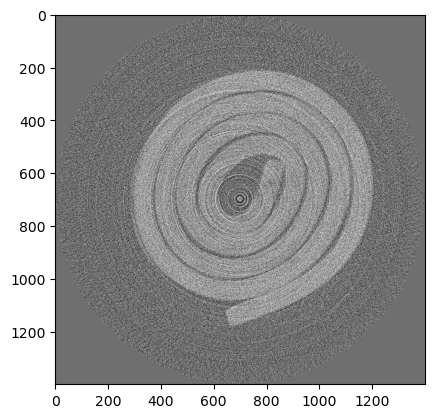

In [3]:
%matplotlib inline
# setup the plotting environment
plt.imshow(a, cmap = 'gray'); # show a single image

### Subplots
Here we show multiple subplots within a single figure

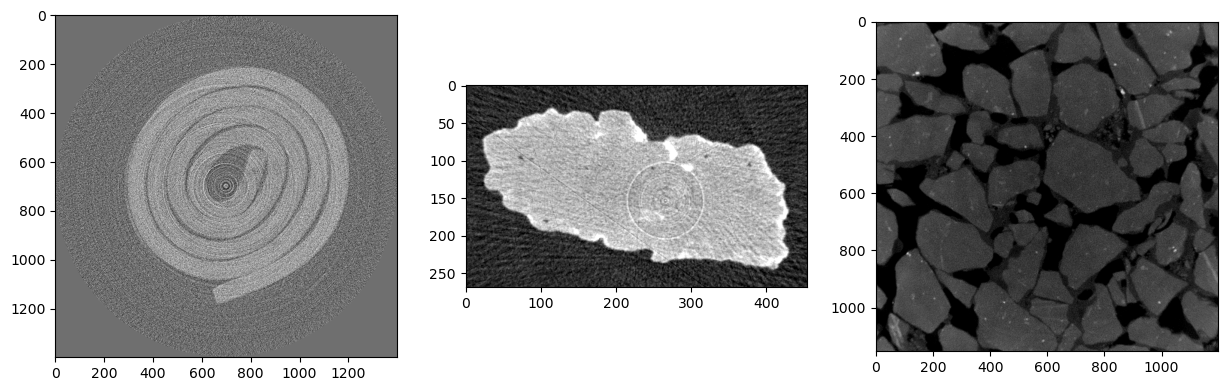

In [4]:
%matplotlib inline
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.imshow(a, cmap = 'gray')
ax2.imshow(b, cmap = 'gray')
ax3.imshow(c, cmap = 'gray')

## Compute SNR
We can compute the SNR by looking at the ratio of the mean to the standard deviation in a region that is supposed to be constant

$$ SNR = \frac{\mu_{img}}{\sigma_{img}} $$

SNR for A_1 is 2.49176960643086


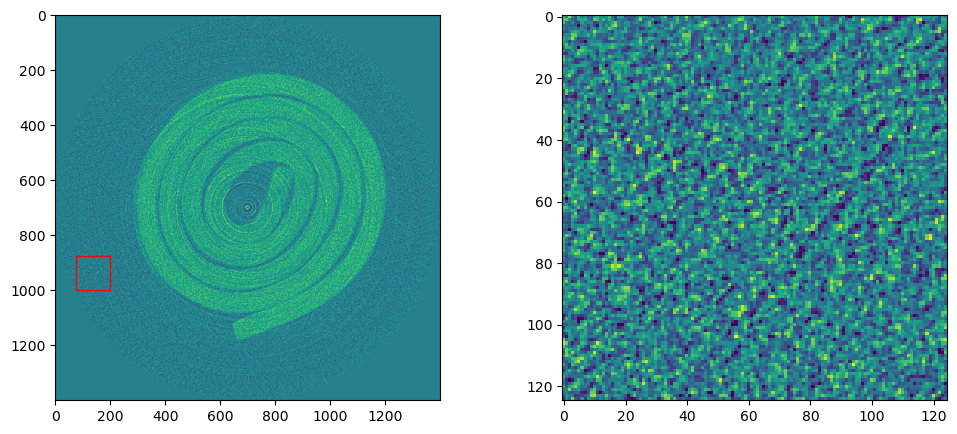

In [5]:
# Identify the region
x1 = 75
x2 = 200
y1 = 875
y2 = 1000

fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].imshow(a)
ax[0].add_patch( Rectangle((x1, y1),
                        x2-x1, y2-y1,
                        fc ='none', 
                        ec ='r',
                        lw = 1) )
# extract a sub image
subA1=a[x1:x2,y1:y2];
snrA1=np.mean(subA1)/np.std(subA1) # compute the snr
print("SNR for A_1 is {}".format(snrA1))
ax[1].imshow(subA1);

## __Tasks__
1. Find a second region in a
1. Repeat the procedure with images b and c

# Exercise 2
Test filter performance for different SNR and filter types. We will here focus on the uniform convolution filter kernel and the median filter.

The first step is to create a set of noisy images based on the clean image ```data/testpattern.png```. 

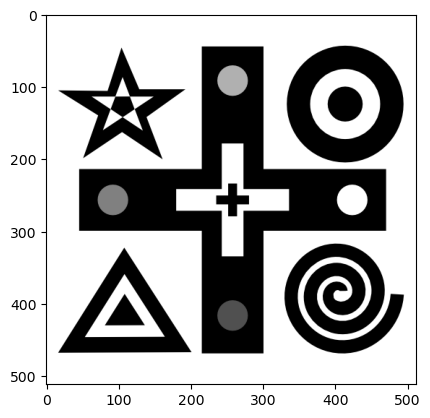

In [7]:
d=np.mean(imread('data/testpattern.png'),2)
plt.imshow(d, cmap= 'gray');

Next step is to create a dictionary of noisy images with different SNR, e.g. SNR=1,2,5,10,20,100. Use additive white Gaussian noise.
The random number generator is imported from numpy ```import numpy.random.normal as normal```.

In [11]:
from numpy.random import randn

def show_noisy_images(scale_100, scale_10, scale_5, scale_2, scale_1):
    fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2, 3, figsize=(8.5,5))
    ax1.imshow(d)
    ax1.set_title('Original')

    d_snr100=d.copy()+scale_100*randn(*d.shape);
    ax2.imshow(d_snr100)
    ax2.set_title('SNR 100')


    d_snr10=d.copy()+scale_10*randn(*d.shape);
    ax3.imshow(d_snr10)
    ax3.set_title('SNR 10')

    scale = 100 
    d_snr5=d.copy()+scale_5*randn(*d.shape);
    ax4.imshow(d_snr5)
    ax4.set_title('SNR 5')

    scale = 1000 
    d_snr2=d.copy()+scale_2*randn(*d.shape);
    ax5.imshow(d_snr2)
    ax5.set_title('SNR 2')

    scale = 5000 
    d_snr1=d.copy()+scale_1*randn(*d.shape);
    ax6.imshow(d_snr1)
    ax6.set_title('SNR 1')
    return idict({1: d_snr1, 2: d_snr2, 5: d_snr5, 10: d_snr10, 100: d_snr100})
noisy_images = interactive(show_noisy_images, scale_100 = (0.0,1.0), scale_10 = (0.0,10.0), scale_5 = (0.0,50.0), scale_2 = (0.0,100.0), scale_1 = (0.0,200.0))
display(noisy_images)

interactive(children=(FloatSlider(value=0.5, description='scale_100', max=1.0), FloatSlider(value=5.0, descrip…

In [ ]:
SNRs = [1.0,2.0,5.0,10.0,20.0,100.0]
noisy_images = {}

for SNR in SNRs :
    noisy_images[SNR]=img/img.max() + 1.0/SNR*np.random.normal(0,1,size=img.shape) 
    
fig, axes = plt.subplots(2,3,figsize = (15,10))
axes=axes.ravel()
    
for  ((snr,img),ax) in zip(noisy_images.items(),axes) :
    ax.imshow(img)


In [ ]:
plt.imshow(noisy_images[1])

# Filter the images
You can read about the standard filters in scipy by looking at the documentation in http://docs.scipy.org/doc/scipy-0.14.0/reference/ndimage.html#module-scipy.ndimage.filters alternatively more (different) filters are available using scikit image or OpenCV for the more advanced students

## Uniform Filters
Check the uniform filter documentation for reference:
http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.filters.uniform_filter.html#scipy.ndimage.filters.uniform_filter

In this example we explore how the filter width of a uniform filter affects the image quality of the noisy test images we created earlier. Pay attention to how the SNR improves with the filter size and what the effect is on the edges in the image. 

The code below is mainly about showing the results. The important lines are commented.

In [ ]:
from scipy.ndimage.filters import uniform_filter

# Size of the filter windows. You can select different filter sizes if you like. 
# Always use odd numbers for the filter size unless you have a good reason. 
N=[3,5,7];

fig, all_axes = plt.subplots(5, 1+len(N), figsize=(15,20))
for ((snr,img),ax) in zip(noisy_images.items(),all_axes) :
    ax[0].imshow(img,cmap='gray')
    ax[0].set_title("Raw, SNR:{}".format(snr))
    for idx,filter_size in enumerate(N):       
        
        filtered = uniform_filter(img,filter_size) # Here the actual filtering takes place
        
        ax[1+idx].imshow(filtered, cmap='gray')
        ax[1+idx].set_title("N:{}, SNR:{}".format(filter_size,snr))

## Median Filter
Complete the same exercise as before using the median filter. Docs:
http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.filters.median_filter.html#scipy.ndimage.filters.median_filter

Do you notice a difference? If, yes for which SNR and filter sizes?

In [ ]:
# insert your code here


## Exercise 3 - Diffusion filter
The diffusion filter is more complicated than the previous filters we have used. It is based on iteratively solving 

$$\frac {\partial I}{\partial t}=\mathrm {div} \left(c(|\nabla (G_{\sigma }*I)|^{2})\nabla I\right)$$

for the image $I$. 

The regularization function 

$$G_{\sigma }=C{\sigma }^{-\left(1/2\right)}\exp \left(-|x|^{2}/4{\sigma }\right)$$

is used to reduce the impact of noise in the diffusivity function. In a second step you will implement this smoothing in the filter code.

In [ ]:
def anisodiff(img,niter=1,kappa=50,gamma=0.1,step=(1.,1.),sigma=0.0,option=1,ploton=False):
    """
    Anisotropic diffusion.

    Usage:
    imgout = anisodiff(im, niter, kappa, gamma, option)

    Arguments:
            img    - input image
            niter  - number of iterations
            kappa  - conduction coefficient 20-100 ?
            gamma  - max value of .25 for stability
            step   - tuple, the distance between adjacent pixels in (y,x)
            option - 1 Perona Malik diffusion equation No 1
                     2 Perona Malik diffusion equation No 2
            ploton - if True, the image will be plotted on every iteration

    Returns:
            imgout   - diffused image.

    kappa controls conduction as a function of gradient.  If kappa is low
    small intensity gradients are able to block conduction and hence diffusion
    across step edges.  A large value reduces the influence of intensity
    gradients on conduction.

    gamma controls speed of diffusion (you usually want it at a maximum of
    0.25)

    step is used to scale the gradients in case the spacing between adjacent
    pixels differs in the x and y axes

    Diffusion equation 1 favours high contrast edges over low contrast ones.
    Diffusion equation 2 favours wide regions over smaller ones.

    Reference: 
    P. Perona and J. Malik. 
    Scale-space and edge detection using ansotropic diffusion.
    IEEE Transactions on Pattern Analysis and Machine Intelligence, 
    12(7):629-639, July 1990.

    Original MATLAB code by Peter Kovesi  
    School of Computer Science & Software Engineering
    The University of Western Australia
    pk @ csse uwa edu au
    <http://www.csse.uwa.edu.au>

    Translated to Python and optimised by Alistair Muldal
    Department of Pharmacology
    University of Oxford
    <alistair.muldal@pharm.ox.ac.uk>

    June 2000  original version.       
    March 2002 corrected diffusion eqn No 2.
    July 2012 translated to Python

    February 2020 Revised for Python 3.6 / A. Kaestner
    """

    # ...you could always diffuse each color channel independently if you
    # really want
    if img.ndim == 3:
        warnings.warn("Only grayscale images allowed, converting to 2D matrix")
        img = img.mean(2)

    # initialize output array
    img = img.astype('float32')
    imgout = img.copy()

    # initialize some internal variables
    deltaS = np.zeros_like(imgout)
    deltaE = deltaS.copy()
    NS = deltaS.copy()
    EW = deltaS.copy()
    gS = np.ones_like(imgout)
    gE = gS.copy()

    # create the plot figure, if requested
    if ploton:
        import matplotlib.pyplot as plt
        from time import sleep

        plt.figure(figsize=(20,5.5),num="Anisotropic diffusion")
        plt.subplot(1,3,1)
        plt.imshow(img,interpolation='nearest')
        plt.title('Original')
        plt.colorbar()

        
    for ii in np.arange(0,niter):
        smoothimgout = imgout
        
        if sigma != 0 :
            smoothimgout = imgout         ###### Introduce gradient smoothing here 
            
        # calculate the diffs
        deltaS[:-1,: ] = np.diff(smoothimgout,axis=0)
        deltaE[: ,:-1] = np.diff(smoothimgout,axis=1)
        

        # conduction gradients (only need to compute one per dim!)
        if option == 1:
            gS = np.exp(-(deltaS/kappa)**2.)/step[0]
            gE = np.exp(-(deltaE/kappa)**2.)/step[1]
        elif option == 2:
            gS = 1./(1.+(deltaS/kappa)**2.)/step[0]
            gE = 1./(1.+(deltaE/kappa)**2.)/step[1]

        # update matrices
        E = gE*deltaE
        S = gS*deltaS

        # subtract a copy that has been shifted 'North/West' by one
        # pixel. don't as questions. just do it. trust me.
        NS[:] = S
        EW[:] = E
        NS[1:,:] -= S[:-1,:]
        EW[:,1:] -= E[:,:-1]

        # update the image
        imgout += gamma*(NS+EW)

    if ploton:
        iterstring = "Iteration %i" %(ii+1)
        plt.subplot(1,3,2)
        plt.imshow(imgout)
        plt.title(iterstring)
        
        plt.subplot(1,3,3)
        plt.imshow(img-imgout)
        plt.title('Difference before - after')


    return imgout

### Part 3.1 Find filter parameters
__Task:__ Tune the filter parameters for the three experiment images.  
In this exercise you need to find the parameters to suppress the noise in the image.  
__Hint:__ compute the histogram of the gradient image, this will guide you. A very important parameter is $\kappa$ that acts a sensitivity threshold on the gradient contribution. The solution time  i.e. $n_{iter} \times step$ also plays a role in the filter strength. 

There are two conductivity controlling functions 

$$c_1(x)=e^{-(x/\kappa)^2.}$$

and 

$$c_2(x)=\frac{1}{1+(x/\kappa)^2}$$

Plot these with the histogram of the gradient image to better understand how to set $\kappa$.

In [ ]:
from skimage.filters import sobel # the sobel filter computes the absolute gradient of an image.

edge_magnitude = sobel(a)

fig,ax = plt.subplots(1,3,figsize=(15,5))
h=np.histogram(edge_magnitude.ravel(),bins=200);
h[0][0]=h[0][1]
ax[0].plot(h[1][1:],h[0],label='histogram')
k1=0.3
ax[0].plot(h[1][1:],h[0].max()*np.exp(-(h[1][1:]/k1)**2),label='$c_1(x)$')
k2=0.2
ax[0].plot(h[1][1:],h[0].max()*(1/(1+(h[1][1:]/k2)**2)),label='$c_2(x)$')
ax[0].legend()
a1=ax[1].imshow(np.exp(-(edge_magnitude/k1)**2))
fig.colorbar(a1,ax=ax[1],shrink=0.75)
ax[1].set_title('$c_1$')
a2=ax[2].imshow(1/(1+(edge_magnitude/k2)**2))
fig.colorbar(a2,ax=ax[2],shrink=0.75)
ax[2].set_title('$c_2$');

Great values in this histogram are asociated with the edges. As you can see, there is not very much edge information in this image. The purpose of the conductivity function is to stop the diffusion the edges and only let it act 

In [ ]:
niter=10 
kappa=50  
gamma=0.1 
step=(0.25, 0.25) 
option=2  # select weighing equation
ploton=True
res=anisodiff(img=a, niter=niter, kappa=kappa, gamma=gamma, step=step, option=option,ploton=ploton)

### Part 3.2 Introduce some regularization (more advanced)
The original Perona Malik filter is very sensitive to noise. A way improve this is to smooth the image before computing the gradient. 

- Locate the line ```###### Introduce gradient smoothing here``` in the filter function and add a line to filter the image that is used to compute the gradient using a Gauss filter.

$$G_{\sigma }=C{\sigma }^{-\left(1/2\right)}\exp \left(-|x|^{2}/4{\sigma }\right)$$

- Use filtered image for the gradient but keep ```imgout``` to update the filter iteration.
- Use the parameter ```sigma``` to the function definition to control the width of the Gauss kernel.
- Compare the preformance

__Note:__ You may need to adjust $\kappa$ with this filter.

In [ ]:
niter=10 
kappa=50  
gamma=0.1 
sigma=1.0
step=(0.25, 0.25) 
option=2  # select weighing equation
ploton=True
res=anisodiff(img=a, niter=niter, kappa=kappa, gamma=gamma, step=step, option=option,sigma=sigma,ploton=ploton)